In [1]:
from oldModel import OrientationWei, sensory_noise_dist, sensory_noise_dist_sample
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('talk')


from scipy.integrate import simpson, trapezoid
import numpy as np
from scipy.interpolate import UnivariateSpline, interp1d
from ipywidgets import interact
from sklearn.neighbors import KernelDensity
from scipy.stats import gaussian_kde

In [2]:
import riskModelPercept as model

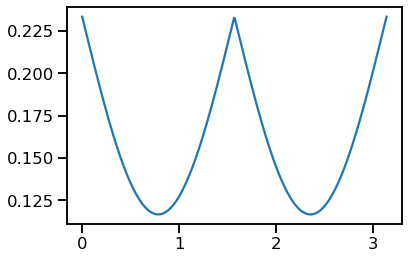

In [3]:
plt.plot(model.stim_grid/2., (model.prior(model.stim_grid)))
# model.value_function_ori((4./180.)*np.pi, type = "prior")

# for i in range(0,8):

    
#     plt.axvline(0.125*np.pi + 0.25*i*np.pi, c='k')

# plt.title("Natural prior over orientations")
# plt.xlabel("$\Theta$ (in degrees)")
# plt.ylabel("P($\Theta$)")
# plt.savefig('/Users/sbedi/Downloads/testfig.png',dpi=300, bbox_inches = "tight")


# plt.plot(model.stim_grid, 2*np.cos(2*model.stim_grid))

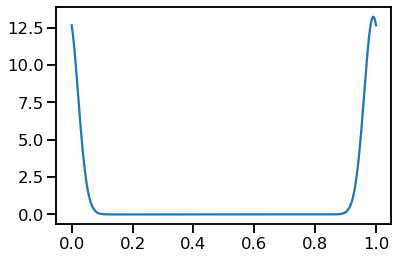

In [4]:
plt.plot(model.rep_grid, model.sensory_noise(0.991, 0.03, model.rep_grid))

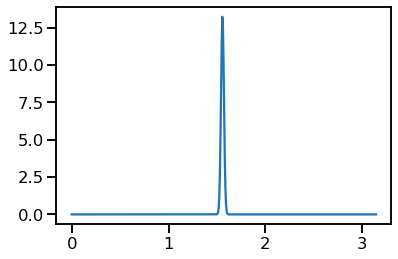

In [9]:
plt.plot(model.stim_grid/2., model.stimulus_noise(0.991*np.pi, 0.03, model.stim_grid))

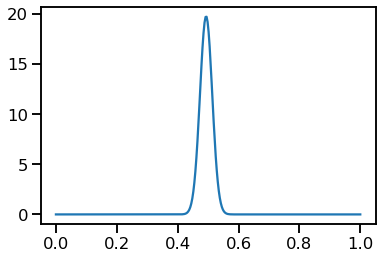

In [10]:
p_m_given_theta0, p_m_given_theta = model.MI_efficient_encoding(0.991*np.pi, 0.01, 0.02)

plt.plot(model.rep_grid, p_m_given_theta0[0])

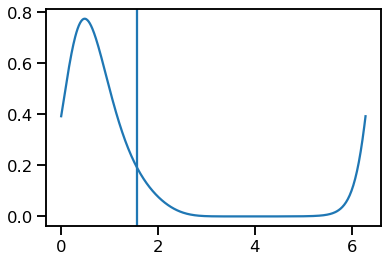

In [11]:
plt.plot(model.stim_grid, model.bayesian_decoding(0.2*np.pi, 0.06, 0.06)[0])
plt.axvline(0.5*np.pi)

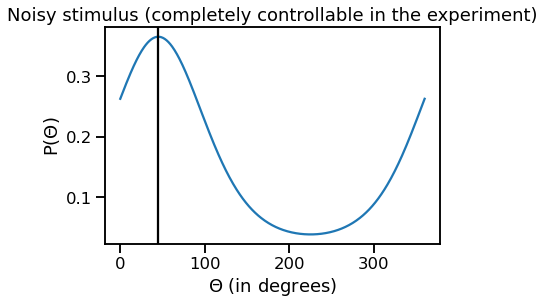

In [12]:
# a, b = model.MI_efficient_encoding(1.9*np.pi, sigma_stim, sigma_rep)
# np.shape(a)
# # np.shape(b)
# plt.plot(np.squeeze(a))
theta0 = 0.25*np.pi
sigma_stim = 0.3*np.pi

plt.plot(model.stim_grid*180./np.pi, np.squeeze(model.stimulus_noise(theta0, sd=sigma_stim, grid=model.stim_grid[np.newaxis, :])))
plt.axvline(theta0*180./np.pi, c='k')

plt.title("Noisy stimulus (completely controllable in the experiment)")
plt.xlabel("$\Theta$ (in degrees)")
plt.ylabel("P($\Theta$)")
plt.savefig('/Users/sbedi/Downloads/testfig.png',dpi=300, bbox_inches = "tight")

In [9]:
import scipy.stats as ss

In [11]:
stim_grid = model.stim_grid
p_thetaest_given_theta0 = ss.vonmises(kappa=.5, loc=1.666).pdf(model.stim_grid)[np.newaxis, :]

np.angle(trapezoid(np.exp(1j*stim_grid[np.newaxis, :])*p_thetaest_given_theta0, stim_grid, axis=1)) % (2*np.pi)

array([1.666])

0.9956406871214324

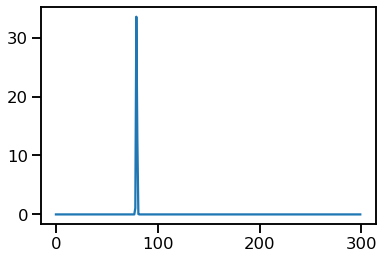

In [12]:
p = ss.vonmises(kappa=1/(0.0001), loc=1.666).pdf(model.rep_grid*2*np.pi)
plt.plot(p)
trapezoid(p, model.rep_grid*2*np.pi)

/Users/sbedi/git/Information-and-Value/encoding_decoding/riskModelPercept.py:58: RuntimeWarning: invalid value encountered in true_divide
  p_m_given_theta /= trapezoid(p_m_given_theta, axis=2)[:, :, np.newaxis]
/Users/sbedi/git/Information-and-Value/encoding_decoding/riskModelPercept.py:92: RuntimeWarning: invalid value encountered in remainder
  return np.angle(trapezoid(np.exp(1j*stim_grid[np.newaxis, :])*p_thetaest_given_theta0, stim_grid, axis=1)) % (2*np.pi)


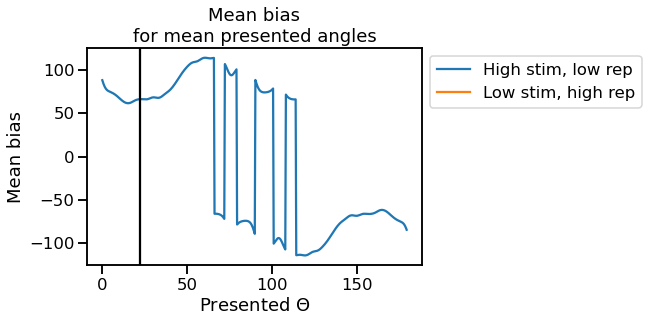

In [5]:
theta0 = np.linspace(0.01, 1.99*np.pi, 500) #0.8

high_stim_noise = 0.014*1.99*np.pi
low_stim_noise = 0.001*1.99*np.pi
high_rep_noise = 0.014
low_rep_noise = 0.001

low_risky_rep = low_rep_noise
high_risky_rep = high_rep_noise


# E_theta_given_theta0 = model.expected_thetahat_theta0(theta0, high_stim_noise, high_rep_noise)
# plt.plot(theta0, E_theta_given_theta0 - theta0, label = "Both noises high")

E_theta_given_theta0 = model.expected_thetahat_theta0(theta0, high_stim_noise, low_rep_noise)
plt.plot(theta0*90./np.pi, (E_theta_given_theta0 - theta0)*90./np.pi, label = "High stim, low rep")

E_theta_given_theta0 = model.expected_thetahat_theta0(theta0, low_stim_noise, high_rep_noise)
plt.plot(theta0*90./np.pi, (E_theta_given_theta0 - theta0)*90./np.pi, label = "Low stim, high rep")

# E_theta_given_theta0 = model.expected_thetahat_theta0(theta0, low_stim_noise, low_rep_noise)
# plt.plot(theta0, E_theta_given_theta0 - theta0, label = "Both noises low")



# #risky

# E_theta_given_theta0 = model.expected_thetahat_theta0(theta0, high_stim_noise, high_risky_rep)
# plt.plot(theta0, E_theta_given_theta0 - theta0, label = "High stim, low rep - risky")


# E_theta_given_theta0 = model.expected_thetahat_theta0(theta0, high_stim_noise, low_risky_rep)
# plt.plot(theta0, E_theta_given_theta0 - theta0, label = "Low stim, high rep - risky")



plt.axvline(22.5, c='k')


# for i in range(0,4):

    
#     plt.axvline(0.125*np.pi + 0.25*np.pi*i, c='k')



# plt.axvline(np.pi, c='k')
# plt.axvline(1.5*np.pi, c='k')


plt.legend(bbox_to_anchor=(1., 1.0))

plt.title("Mean bias\nfor mean presented angles")
plt.xlabel("Presented $\Theta$")
plt.ylabel("Mean bias")
plt.savefig('/Users/sbedi/Downloads/testfig.png',dpi=300, bbox_inches = "tight")

In [14]:
# iF THE RISKY ATTITUDES Came directly from the mean perceptual bias from above, then we would get things from below.
# However, risk attitudes are mean of value distribution comparison and not the mapped value comparisons of mean 
# perceptual distributions. We anyways do tyhe following for exercise.

In [15]:
risky_ori = 44.998/180.0*np.pi
risk_prob = 0.65
type = "linearPrior"
sigma_stim = high_stim_noise
sigma_rep = low_rep_noise
percieved_risky_ori = model.expected_thetahat_theta0(risky_ori, sigma_stim, sigma_rep)
percieved_risky_ori - risky_ori
# model.value_function_ori(risky_ori, type)*risk_prob, model.value_function_ori(percieved_risky_ori, type)*risk_prob



array([1.45521065e-06])

In [16]:

safe_ori = 26.5/180.0*np.pi
percieved_safe_ori = model.expected_thetahat_theta0(safe_ori, sigma_stim, sigma_rep)
percieved_safe_ori - safe_ori
model.value_function_ori(safe_ori, type), model.value_function_ori(percieved_safe_ori, type)


(33.888888888888886, array([34.61688184]))

In [412]:
p = model.bayesian_decoding(2.9, 0.01, 0.4)

np.trapz(p[0], model.stim_grid)

0.9999969676263105

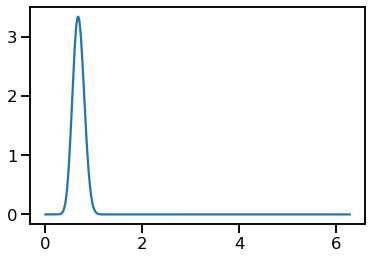

In [394]:
plt.plot(model.stim_grid, p[0])

In [399]:
np.trapz(p[0], model.stim_grid)

1.0000073290012153

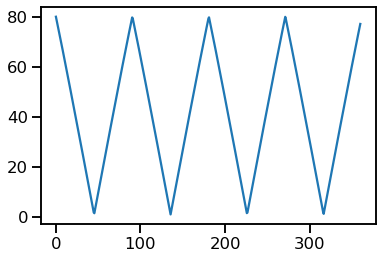

In [10]:
plt.plot(model.stim_grid*180./np.pi,model.value_function_ori(E_theta_given_theta0, type = "linearPrior"))

In [11]:
## Gifs

In [1137]:
theta0List = np.linspace((0./180.)*np.pi, (45./180.)*np.pi, 23)
sigma_stim = 0.05*np.pi

i = 0
for theta0 in theta0List:
    i = i + 1
    fig = plt.plot(model.stim_grid*180./np.pi, np.squeeze(model.stimulus_noise(theta0, sd=sigma_stim, grid=model.stim_grid[np.newaxis, :])))
    plt.axvline(theta0*180./np.pi, c='k', label = '$\Theta_0$ = %02d°'%((theta0*180.)/np.pi))
        
    plt.axvline(theta0*180./np.pi, c='k', label = '$\Theta_0$ = %02d°'%((theta0*180.)/np.pi))
    
    plt.legend()
    
    plt.title("Noisy stimulus (completely controllable in the experiment)")
    plt.xlabel("$\Theta$ (in degrees)")
    plt.ylabel("P($\Theta$)")
#     return fig
    plt.savefig(f'/Users/sbedi/Downloads/testfig%02d.png'%i,dpi=300, bbox_inches = "tight")
    plt.close()

In [48]:
# Sensory encodings throughout theta


high_stim_noise = 0.014*1.99*np.pi
low_stim_noise = 0.001*1.99*np.pi
high_rep_noise = 0.014
low_rep_noise = 0.001

sigma_stim = high_stim_noise
sigma_rep =  low_rep_noise
theta0List = np.linspace((0./180.)*np.pi, (45./180.)*np.pi, 23)


i = 0
for theta0 in theta0List:
    i = i + 1
    fig = plt.plot(model.rep_grid, (model.MI_efficient_encoding(theta0 ,sigma_stim, sigma_rep)[0][0,...]))
    plt.title("$\Theta_0$ = %02d° in high stim and low rep noise" %(theta0*180/np.pi))
#     plt.ylim((0,350))
    plt.xlabel("Neural firing rate (representation)")
    plt.ylabel("Representation distribution")
#     return fig
    plt.savefig(f'/Users/sbedi/Downloads/testfig%02d.png'%i,dpi=300, bbox_inches = "tight")
    plt.close()



In [52]:
# Bayesian decodings throughout theta


high_stim_noise = 0.014*1.99*np.pi
low_stim_noise = 0.001*1.99*np.pi
high_rep_noise = 0.014
low_rep_noise = 0.001

sigma_stim = high_stim_noise
sigma_rep =  high_rep_noise
theta0List = np.linspace((0./180.)*np.pi, (45./180.)*np.pi, 23)


i = 0
for theta0 in theta0List:
    i = i + 1
    fig = plt.plot(model.stim_grid*180/np.pi, (model.bayesian_decoding(theta0 ,sigma_stim, sigma_rep))[0, ...])
    mean_post = model.expected_thetahat_theta0(theta0, sigma_stim, sigma_rep)
    
    plt.axvline(theta0*180./np.pi, c='k', label = '$\Theta_0$ = %.2f°'%((theta0*180.)/np.pi))
    plt.axvline(mean_post*180./np.pi, c='r', linestyle='dashed', label = 'Posterior mean = %.2f°'%(mean_post*180./np.pi))


    
    plt.legend()
    
    plt.title("Inferred $\Theta$ distribution for $\Theta_0$ = %0.2d°.\nHigh stimulus and high sensory noise"%((theta0*180.)/np.pi))
    plt.xlabel("$\Theta$ (in degrees)")
    plt.ylabel("Inferred Distribution")
#     return fig
    plt.savefig(f'/Users/sbedi/Downloads/testfig%02d.png'%i,dpi=300, bbox_inches = "tight")
    plt.close()


In [4]:
# Back to simulations now of value

In [6]:
high_stim_noise = 0.011*1.99*np.pi
low_stim_noise = 0.001*1.99*np.pi
high_rep_noise = 0.011
low_rep_noise = 0.001


theta0 = 12*np.pi/180.0
type = "linearPrior"
interpolation_kind = "linear"
bins = 100
sigma_stim = low_stim_noise
sigma_rep =  high_rep_noise

safe_value, safe_prob = model.safe_value_dist(theta0, sigma_stim, sigma_rep, type, interpolation_kind, bins)

Text(0.5, 1.0, '$\\Theta_0$ = 12degrees')

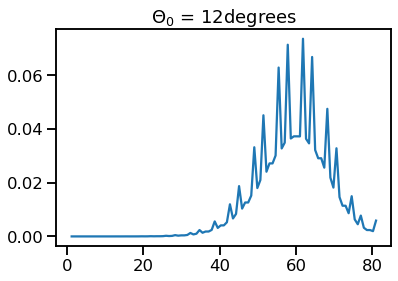

In [7]:
plt.plot(safe_value,safe_prob[0,:])
plt.title("$\Theta_0$ = " + str(round(theta0*180/np.pi))+ "degrees")

In [8]:
def plot_safeVal(theta0, sigma_stim, sigma_rep):

    
    safe_value, safe_prob = model.safe_value_dist(theta0, sigma_stim, sigma_rep , type, interpolation_kind, bins=100)
    plt.plot(safe_value,safe_prob[0,:])
    plt.xlabel("Value")
    plt.ylabel("Inferred Val Distribution")
    

In [9]:
interact(plot_safeVal, theta0 = ((0./180.)*np.pi, (45./180.)*np.pi, 2./180.*np.pi), sigma_stim = ((0.1/180.0)*np.pi, (3./180.0)*np.pi, (0.1/180.0)*np.pi), sigma_rep = ((0.1/180.0), (3./180.0), (0.1/180.0)))


interactive(children=(FloatSlider(value=0.3839724354387525, description='theta0', max=0.7853981633974483, step…

<function __main__.plot_safeVal(theta0, sigma_stim, sigma_rep)>

In [13]:
# safe values throughout theta

high_stim_noise = 0.014*1.99*np.pi    # 5 degrees
low_stim_noise = 0.001*1.99*np.pi
high_rep_noise = 0.014
low_rep_noise = 0.001

sigma_stim = high_stim_noise
sigma_rep =  high_rep_noise
type = "inverseLinearPrior"
interpolation_kind = "linear"


safe_value, safe_prob = model.safe_value_dist(theta0, sigma_stim, sigma_rep, type, interpolation_kind, bins)
theta0List = np.linspace((0./180.)*np.pi, (45./180.)*np.pi, 23)


i = 0
for theta0 in theta0List:
    i = i + 1
    fig = plot_safeVal(theta0, sigma_stim, sigma_rep)
    
#     mean_post = model.expected_thetahat_theta0(theta0, sigma_stim, sigma_rep)
#     plt.axvline(model.value_function_ori(theta0, type), c='k', label = '$Value of mean presented orientation$ = %.2f°'%(model.value_function_ori(theta0, type)))
#     plt.axvline(mean_post*180./np.pi, c='r', linestyle='dashed', label = 'Posterior mean = %.2f°'%(mean_post*180./np.pi))
#     plt.legend()
    
    plt.title("Inferred value distribution distribution for $\Theta_0$ = %0.2d°.\nHigh stimulus and high sensory noise"%((theta0*180.)/np.pi))


#     return fig
    plt.savefig(f'/Users/sbedi/Downloads/testfig%02d.png'%i,dpi=300, bbox_inches = "tight")
    plt.close()



In [10]:
def plot_riskyVal(theta1, sigma_stim, sigma_rep):
    risk_prob = 0.75
    interpolation_kind = "linear"

    safe_value, safe_prob = model.safe_value_dist(theta0, sigma_stim, sigma_rep, type, interpolation_kind, bins)
    risky_value, risky_prob = model.risky_value_dist(theta1, sigma_stim, sigma_rep , risk_prob, type, interpolation_kind, bins=100)
    plt.plot(risky_value,risky_prob[0,:])
    plt.xlabel("Value")
    plt.ylabel("Inferred Val Distribution")
    plt.title("risky value")
    
    

In [11]:
interact(plot_riskyVal, theta1 = ((0./180.)*np.pi, (45./180.)*np.pi, 1./180.*np.pi), sigma_stim = ((0.1/180.0)*np.pi, (3./180.0)*np.pi, (0.1/180.0)*np.pi), sigma_rep = ((0.1/180.0), (3./180.0), (0.1/180.0)))


interactive(children=(FloatSlider(value=0.3839724354387525, description='theta1', max=0.7853981633974483, step…

<function __main__.plot_riskyVal(theta1, sigma_stim, sigma_rep)>

In [13]:
# risky values throughout theta

high_stim_noise = 0.014*1.99*np.pi    # 5 degrees
low_stim_noise = 0.001*1.99*np.pi
high_rep_noise = 0.014
low_rep_noise = 0.001

sigma_stim = low_stim_noise
sigma_rep =  high_rep_noise
type = "inverseLinearPrior"
interpolation_kind = "linear"

safe_value, safe_prob = model.safe_value_dist(theta0, sigma_stim, sigma_rep, type, interpolation_kind, bins)
theta0List = np.linspace((0./180.)*np.pi, (45./180.)*np.pi, 23)


i = 0
for theta0 in theta0List:
    i = i + 1
    fig = plot_riskyVal(theta0, sigma_stim, sigma_rep)
    
#     mean_post = model.expected_thetahat_theta0(theta0, sigma_stim, sigma_rep)
#     plt.axvline(model.value_function_ori(theta0, type), c='k', label = '$Value of mean presented orientation$ = %.2f°'%(model.value_function_ori(theta0, type)))
#     plt.axvline(mean_post*180./np.pi, c='r', linestyle='dashed', label = 'Posterior mean = %.2f°'%(mean_post*180./np.pi))
#     plt.legend()
    
    plt.title("Inferred value distribution distribution for $\Theta_0$ = %0.2d°.\nLow stimulus and high sensory noise"%((theta0*180.)/np.pi))


#     return fig
    plt.savefig(f'/Users/sbedi/Downloads/testfig%02d.png'%i,dpi=300, bbox_inches = "tight")
    plt.close()



In [22]:
high_stim_noise = 0.014*1.99*np.pi
low_stim_noise = 0.001*1.99*np.pi
high_rep_noise = 0.014
low_rep_noise = 0.001
medium_rep_noise = 0.007

risk_rep = 1*sigma_rep


theta0 = 39*np.pi/180.0 #30.124*np.pi/180.0
theta1 = 39*np.pi/180.0 #23.8*np.pi/180.0
type = "linearPrior"
interpolation_kind = "linear"

safe_value, safe_prob = model.safe_value_dist(theta0, sigma_stim, sigma_rep, type, interpolation_kind, bins)
bins = 100
sigma_stim = high_stim_noise
sigma_rep =  low_rep_noise
risk_prob = 1.0

safe_value, safe_prob = model.safe_value_dist(theta0, sigma_stim, sigma_rep , type, interpolation_kind, bins)
risky_value, risky_prob = model.risky_value_dist(theta1, sigma_stim, risk_rep , risk_prob, type , interpolation_kind, bins)


In [23]:
# model.value_function_ori(theta0, type) #safe
model.value_function_ori(theta0, type), risk_prob*model.value_function_ori(theta1, type)

(11.666666666666671, 11.666666666666671)

Text(0.5, 1.0, '$\\Theta_0$ = 39degrees')

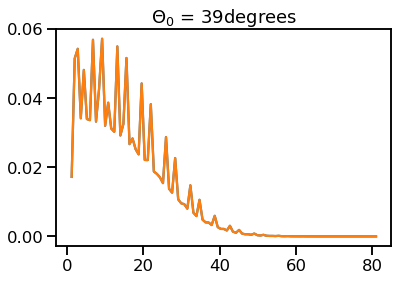

In [24]:
plt.plot(safe_value,safe_prob[0,:])
plt.plot(risky_value,risky_prob[0,:])

plt.title("$\Theta_0$ = " + str(round(theta0*180/np.pi))+ "degrees")


# kde_safe = KernelDensity(kernel="gaussian", bandwidth=0.75).fit(X = safe_value[:, np.newaxis], sample_weight = safe_prob[0,:]+1e-200)
# dens_safe = np.exp(kde_safe.score_samples(safe_value[:, np.newaxis]))



Text(0.5, 1.0, '$\\Theta_1$ = 39degrees')

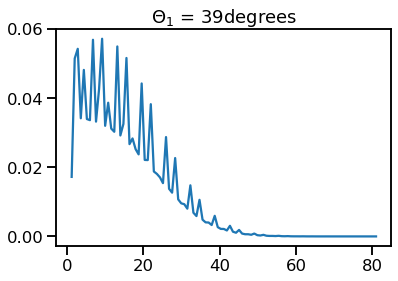

In [25]:
plt.plot(risky_value,risky_prob[0,:])
plt.title("$\Theta_1$ = " + str(round(theta1*180/np.pi))+ "degrees")

In [26]:
# How often is probability distribution 1 (risky) greater than distribution 2 (safe).

model.diff_dist(safe_value, risky_prob, safe_prob)#, model.diff_dist(safe_value, dens_risky, dens_safe[np.newaxis, :])
model.diff_dist(safe_value, safe_prob, risky_prob)

# plt.plot(integrate.cumtrapz(risky_prob[0,:] - safe_prob[0,:], risky_value, initial=0.0))


array([[0.49997637]])

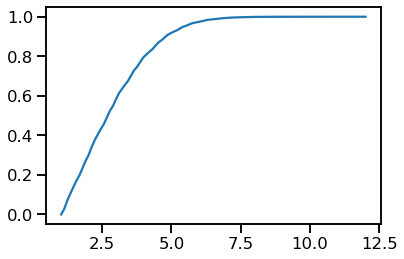

In [19]:
from scipy import integrate

p = []
cdf2 = integrate.cumtrapz(safe_prob, safe_value, initial=0.0, axis=1)

cdf2
plt.plot(safe_value, cdf2[0])
# np.shape(cdf2)

# np.shape(risky_prob)

# prob = risky_prob*cdf2
# plt.plot(safe_value, prob[0])
# # np.shape(prob)

# # p.append(prob)
# # np.shape(p)

# integrate.trapz(prob, risky_value)


In [20]:
cdf2

array([[0.        , 0.02743079, 0.06965486, 0.10496904, 0.13784823,
        0.17063855, 0.19762471, 0.2337669 , 0.26973846, 0.30001279,
        0.33986127, 0.37546976, 0.40368919, 0.43159093, 0.45613625,
        0.49016557, 0.52376988, 0.54842329, 0.5820254 , 0.61329375,
        0.63526876, 0.65667217, 0.67623425, 0.70337816, 0.72988166,
        0.74753488, 0.77162744, 0.79440186, 0.80912227, 0.82316623,
        0.83614315, 0.85377288, 0.8707502 , 0.88130545, 0.89541114,
        0.9087417 , 0.91684205, 0.92438486, 0.93131173, 0.94041976,
        0.94905765, 0.95414461, 0.9607234 , 0.96688614, 0.97044542,
        0.97367354, 0.97659427, 0.98029087, 0.9837409 , 0.98567868,
        0.98740748, 0.98895458, 0.99086576, 0.99263206, 0.99359789,
        0.99477105, 0.99584631, 0.99642406, 0.99692518, 0.99736482,
        0.99788582, 0.99835946, 0.99860746, 0.9988964 , 0.99915715,
        0.99929136, 0.99940444, 0.99950164, 0.99961206, 0.9997108 ,
        0.99976035, 0.99981568, 0.99986482, 0.99

# Linear Prior

In [19]:

high_stim_noise = 0.014*1.99*np.pi
low_stim_noise = 0.001*1.99*np.pi
high_rep_noise = 0.014
low_rep_noise = 0.001



In [15]:
risk_prob = 1.0
interpolation_kind = "linear"
type = "linearPrior"

sigma_stim = high_stim_noise
sigma_rep = low_rep_noise

# Getting all the values from actual transformation
rangeOri = np.linspace(26.5/180., 20.146/180., 11)*np.pi
val_range = model.value_function_ori(rangeOri, type)
safeVal = val_range[0]
riskyVal_range = risk_prob*model.value_function_ori(rangeOri, type)

# getting inferred safe values
safe_value, safe_prob = model.safe_value_dist(rangeOri[0], sigma_stim, sigma_rep , type, interpolation_kind, bins=1000)
# kde_safe = KernelDensity(kernel="gaussian", bandwidth=0.75).fit(X = safe_value[:, np.newaxis], sample_weight = safe_prob[0,:]+1e-100)
# dens_safe = np.exp(kde_safe.score_samples(safe_value[:, np.newaxis]))

# getting inferred risky values
risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, sigma_rep , risk_prob, type, interpolation_kind, bins=1000)

# dens_risky = []
# for i in range(len(risky_prob)):
#     kde_risky = KernelDensity(kernel="gaussian", bandwidth=0.75).fit(X = risky_value[:, np.newaxis], sample_weight = risky_prob[i,:]+1e-00)
#     dens_risk = np.exp(kde_risky.score_samples(risky_value[:, np.newaxis]))
#     dens_risky.append(dens_risk)
    
    
# Risk attitudes 
p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
# p_chose_risky = model.diff_dist(safe_value, dens_risky, dens_safe[np.newaxis, :])


array([[0.49999957, 0.52513481, 0.55016913, 0.57500377, 0.59954253,
        0.6236928 , 0.64736659, 0.67048145, 0.69296124, 0.7147369 ,
        0.73574701]])

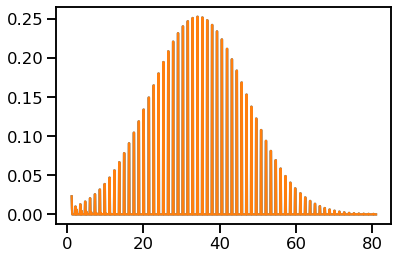

In [16]:
plt.plot(risky_value,risky_prob[0,:])
plt.plot(safe_value,safe_prob[0,:])
p_chose_risky
# np.shape(dens_risky)


In [10]:
def plot_riskAttitudes(sigma_stim, sigma_rep):
    risk_prob = 0.75
    type = "linearPrior"   
    interpolation_kind = "linear"
    
    risky_stim = 0.015*1.99*np.pi - sigma_stim
    risky_rep = 0.015 - sigma_rep

    # Getting all the values from actual transformation
    rangeOri = np.linspace(26.5/180., 15.5/180., 100)*np.pi
    val_range = model.value_function_ori(rangeOri, type)
    safeVal = val_range[0]
    print(safeVal)
    riskyVal_range = risk_prob*model.value_function_ori(rangeOri, type)
    
    # getting inferred safe values
    safe_value, safe_prob = model.safe_value_dist(rangeOri[0], sigma_stim, sigma_rep , type, interpolation_kind, bins=100)
#     kde_safe = KernelDensity(kernel="gaussian", bandwidth=0.75).fit(X = safe_value[:, np.newaxis], sample_weight = safe_prob[0,:]+1e-100)
#     dens_safe = np.exp(kde_safe.score_samples(safe_value[:, np.newaxis]))

    # getting inferred risky values
    risky_value, risky_prob = model.risky_value_dist((rangeOri), risky_stim, risky_rep, risk_prob, type,interpolation_kind,  bins=100)

#     dens_risky = []
#     for i in range(len(risky_prob)):
#         kde_risky = KernelDensity(kernel="gaussian", bandwidth=0.75).fit(X = risky_value[:, np.newaxis], sample_weight = risky_prob[i,:]+1e-100)
#         dens_risk = np.exp(kde_risky.score_samples(risky_value[:, np.newaxis]))
#         dens_risky.append(dens_risk)


    # Risk attitudes 
    p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
#     p_chose_risky = model.diff_dist(safe_value, dens_risky, dens_safe[np.newaxis, :])


    # The value of the safe option
    plt.axvline(safeVal, c='r')
    # Where the risky option value is the same as the safe option value,
    # the probability of chosing should have been 0.5 i there were no biases at all.
    plt.axhline(0.5, c='k', ls='--')
#     plt.ylim(0.45,0.55)
    
    # Plotting the risky option value throughout the range and comparing where it crosses the 0.5 probability mark
    # and whether it is equal to the actual rational equilibrium that would have been without biases.
    plt.plot(riskyVal_range, np.squeeze(p_chose_risky), label=['rep',sigma_rep, "stim (deg)",round(sigma_stim*180,2)])

    

    
    plt.xlabel("Value of risky option")
    plt.ylabel("Prob of chosing risky option")
    plt.title("Value Function - " + type)

In [11]:
interact(plot_riskAttitudes, sigma_stim = (low_stim_noise, high_stim_noise, 0.002*1.99*np.pi), sigma_rep = (low_rep_noise, high_rep_noise, 0.002))

interactive(children=(FloatSlider(value=0.04376238566450582, description='sigma_stim', max=0.08752477132901164…

<function __main__.plot_riskAttitudes(sigma_stim, sigma_rep)>

In [44]:
def plot_riskAttitudes(sigma_stim, sigma_rep):
    risk_prob = 0.75
    type = "linearPrior"
    interpolation_kind = "linear"
        
    rangeOri = np.linspace(48./180., 52./180., 5)*np.pi
    safe_value, safe_prob = model.safe_value_dist(rangeOri[0], sigma_stim, sigma_rep , type, interpolation_kind, bins=25)
    risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, sigma_rep , risk_prob, type, interpolation_kind, bins=25) 
    p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
    safeVal = model.value_function_ori(rangeOri[0], type)
    riskyVal = risk_prob*model.value_function_ori(rangeOri, type)
    risky_ori = interp1d(riskyVal, rangeOri)
    rationalEquilibrium = risky_ori(safeVal)*180/np.pi
    plt.axvline(rationalEquilibrium, c='k', ls='--')
    plt.axhline(0.5, c='k', ls='--')
    plt.plot(rangeOri*180.0/np.pi, np.squeeze(p_chose_risky), label=['rep',sigma_rep, "stim (deg)",round(sigma_stim*180,2)])
        
    rangeOri = np.linspace(52./180., 59./180., 8)*np.pi
    safe_value, safe_prob = model.safe_value_dist(rangeOri[0], sigma_stim, sigma_rep , type, interpolation_kind, bins=25)
    risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, sigma_rep , risk_prob, type, interpolation_kind, bins=25) 
    p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
    safeVal = model.value_function_ori(rangeOri[0], type)
    riskyVal = risk_prob*model.value_function_ori(rangeOri, type)
    risky_ori = interp1d(riskyVal, rangeOri)
    rationalEquilibrium = risky_ori(safeVal)*180/np.pi
    plt.axvline(rationalEquilibrium, c='k', ls='--')
    plt.axhline(0.5, c='k', ls='--')
    plt.plot(rangeOri*180.0/np.pi, np.squeeze(p_chose_risky), label=['rep',sigma_rep, "stim (deg)",round(sigma_stim*180,2)])
    
    rangeOri = np.linspace(59./180., 70./180., 12)*np.pi
    safe_value, safe_prob = model.safe_value_dist(rangeOri[0], sigma_stim, sigma_rep , type, interpolation_kind, bins=25)
    risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, sigma_rep , risk_prob, type, interpolation_kind, bins=25) 
    p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
    safeVal = model.value_function_ori(rangeOri[0], type)
    riskyVal = risk_prob*model.value_function_ori(rangeOri, type)
    risky_ori = interp1d(riskyVal, rangeOri)
    rationalEquilibrium = risky_ori(safeVal)*180/np.pi
    plt.axvline(rationalEquilibrium, c='k', ls='--')
    plt.axhline(0.5, c='k', ls='--')
    plt.plot(rangeOri*180.0/np.pi, np.squeeze(p_chose_risky), label=['rep',sigma_rep, "stim (deg)",round(sigma_stim*180,2)])
    

    rangeOri = np.linspace(71./180., 88./180., 18)*np.pi
    safe_value, safe_prob = model.safe_value_dist(rangeOri[0], sigma_stim, sigma_rep , type, interpolation_kind, bins=25)
    risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, sigma_rep , risk_prob, type, interpolation_kind, bins=25) 
    p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
    safeVal = model.value_function_ori(rangeOri[0], type)
    riskyVal = risk_prob*model.value_function_ori(rangeOri, type)
    risky_ori = interp1d(riskyVal, rangeOri)
    rationalEquilibrium = risky_ori(safeVal)*180/np.pi
    plt.axvline(rationalEquilibrium, c='k', ls='--')
    plt.axhline(0.5, c='k', ls='--')
    plt.plot(rangeOri*180.0/np.pi, np.squeeze(p_chose_risky), label=['rep',sigma_rep, "stim (deg)",round(sigma_stim*180,2)])
    
    
    
    plt.xlabel("orientation of risky option")
    plt.ylabel("prob of chosing risky option")
    plt.title("Value Function - linearPrior")

In [45]:
interact(plot_riskAttitudes, sigma_stim = (low_stim_noise, high_stim_noise, 0.004*1.99*np.pi), sigma_rep = (0.001, 0.014, 0.002))



interactive(children=(FloatSlider(value=0.031258846903218444, description='sigma_stim', max=0.0875247713290116…

<function __main__.plot_riskAttitudes(sigma_stim, sigma_rep)>

In [46]:
def plot_riskAttitudesValue(sigma_stim, sigma_rep):
    risk_prob = 0.75
    type = "linearPrior"
    interpolation_kind = "linear"

    rangeOri = np.linspace(48./180., 52./180., 5)*np.pi
    safe_value, safe_prob = model.safe_value_dist(rangeOri[0], sigma_stim, sigma_rep , type, interpolation_kind, bins=25)
    risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, sigma_rep , risk_prob, type, interpolation_kind, bins=25) 
    p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
    safeVal = model.value_function_ori(rangeOri[0], type)
    riskyVal = risk_prob*model.value_function_ori(rangeOri, type)
    plt.axvline(0, c='k', ls='--')
    plt.axhline(0.5, c='k', ls='--')
    plt.plot(riskyVal - safeVal, np.squeeze(p_chose_risky), label=['rep',sigma_rep, "stim (deg)",round(sigma_stim*180,2)])

    rangeOri = np.linspace(52./180., 59./180., 8)*np.pi
    safe_value, safe_prob = model.safe_value_dist(rangeOri[0], sigma_stim, sigma_rep , type, interpolation_kind, bins=25)
    risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, sigma_rep , risk_prob, type, interpolation_kind, bins=25) 
    p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
    safeVal = model.value_function_ori(rangeOri[0], type)
    riskyVal = risk_prob*model.value_function_ori(rangeOri, type)
    plt.axvline(0, c='k', ls='--')
    plt.axhline(0.5, c='k', ls='--')
    plt.plot(riskyVal - safeVal, np.squeeze(p_chose_risky), label=['rep',sigma_rep, "stim (deg)",round(sigma_stim*180,2)])


    rangeOri = np.linspace(59./180., 70./180., 12)*np.pi
    safe_value, safe_prob = model.safe_value_dist(rangeOri[0], sigma_stim, sigma_rep , type,interpolation_kind, bins=25)
    risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, sigma_rep , risk_prob, type, interpolation_kind, bins=25) 
    p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
    safeVal = model.value_function_ori(rangeOri[0], type)
    riskyVal = risk_prob*model.value_function_ori(rangeOri, type)
    plt.axvline(0, c='k', ls='--')
    plt.axhline(0.5, c='k', ls='--')
    plt.plot(riskyVal - safeVal, np.squeeze(p_chose_risky), label=['rep',sigma_rep, "stim (deg)",round(sigma_stim*180,2)])


    rangeOri = np.linspace(71./180., 88./180., 18)*np.pi
    safe_value, safe_prob = model.safe_value_dist(rangeOri[0], sigma_stim, sigma_rep , type, interpolation_kind, bins=25)
    risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, sigma_rep , risk_prob, type, interpolation_kind, bins=25) 
    p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
    safeVal = model.value_function_ori(rangeOri[0], type)
    riskyVal = risk_prob*model.value_function_ori(rangeOri, type)
    plt.axvline(0, c='k', ls='--')
    plt.axhline(0.5, c='k', ls='--')
    plt.plot(riskyVal - safeVal, np.squeeze(p_chose_risky), label=['rep',sigma_rep, "stim (deg)",round(sigma_stim*180,2)])




    plt.xlabel("Value Difference")
    plt.ylabel("prob of chosing risky option")
    plt.title("Value Function - linear Prior")

In [47]:
interact(plot_riskAttitudesValue, sigma_stim = ((0.0001/180.0)*np.pi, (1./180.0)*np.pi, (0.1/180.0)*np.pi), sigma_rep = ((0.1/180.0), (3./180.0), (0.2/180.0)))

interactive(children=(FloatSlider(value=0.0069814915409025175, description='sigma_stim', max=0.017453292519943…

<function __main__.plot_riskAttitudesValue(sigma_stim, sigma_rep)>

# Inverse Linear Prior

In [48]:

high_stim_noise = 0.014*1.99*np.pi
low_stim_noise = 0.001*1.99*np.pi
high_rep_noise = 0.014
low_rep_noise = 0.001

medium_rep_noise = 0.02




In [49]:
def plot_riskAttitudes(sigma_stim, sigma_rep):
    risk_prob = 0.75
    type = "inverseLinearPrior" 
    interpolation_kind = "linear"
    

    # Getting all the values from actual transformation
    rangeOri = np.linspace(22.5/180., 33.5/180., 11)*np.pi
    val_range = model.value_function_ori(rangeOri, type)
    safeVal = val_range[0]
    riskyVal_range = risk_prob*model.value_function_ori(rangeOri, type)
    
    # getting inferred values
    safe_value, safe_prob = model.safe_value_dist(rangeOri[0], sigma_stim, sigma_rep , type, interpolation_kind, bins=100)
    risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, sigma_rep , risk_prob, type, interpolation_kind, bins=100)
    
    # Risk attitudes
    p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)

    # The value of the safe option
    plt.axvline(safeVal, c='r', ls='--')
    # Where the risky option value is the same as the safe option value,
    # the probability of chosing should have been 0.5 i there were no biases at all.
    plt.axhline(0.5, c='k', ls='--')
#     plt.ylim(0.45,0.55)
    
    # Plotting the risky option value throughout the range and comparing where it crosses the 0.5 probability mark
    # and whether it is equal to the actual rational equilibrium that would have been without biases.
    plt.plot(riskyVal_range, np.squeeze(p_chose_risky), label=['rep',sigma_rep, "stim (deg)",round(sigma_stim*180,2)])

    

    
    plt.xlabel("Value of risky option")
    plt.ylabel("Prob of chosing risky option")
    plt.title("Value Function - " + type)

In [50]:
interact(plot_riskAttitudes, sigma_stim = (low_stim_noise, high_stim_noise, 0.002*1.99*np.pi), sigma_rep = (low_rep_noise, high_rep_noise, 0.002))



interactive(children=(FloatSlider(value=0.04376238566450582, description='sigma_stim', max=0.08752477132901164…

<function __main__.plot_riskAttitudes(sigma_stim, sigma_rep)>

In [120]:
def plot_riskAttitudes(sigma_stim, sigma_rep):
    risk_prob = 0.75
    type = "inverseLinearPrior"
        
    rangeOri = np.linspace(3./180., 7./180., 5)*np.pi
    safe_value, safe_prob = model.safe_value_dist(rangeOri[0], sigma_stim, sigma_rep , type, bins=25)
    risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, sigma_stim , risk_prob, type, bins=25) 
    p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
    safeVal = model.value_function_ori(rangeOri[0], type)
    riskyVal = risk_prob*model.value_function_ori(rangeOri, type)
    risky_ori = interp1d(riskyVal, rangeOri)
    rationalEquilibrium = risky_ori(safeVal)*180/np.pi
    plt.axvline(rationalEquilibrium, c='k', ls='--')
    plt.axhline(0.5, c='k', ls='--')
    plt.plot(rangeOri*180.0/np.pi, np.squeeze(p_chose_risky), label=['rep',sigma_rep, "stim (deg)",round(sigma_stim*180,2)])
        
    rangeOri = np.linspace(7./180., 14./180., 8)*np.pi
    safe_value, safe_prob = model.safe_value_dist(rangeOri[0], sigma_stim, sigma_rep , type, bins=25)
    risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, sigma_stim , risk_prob, type, bins=25) 
    p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
    safeVal = model.value_function_ori(rangeOri[0], type)
    riskyVal = risk_prob*model.value_function_ori(rangeOri, type)
    risky_ori = interp1d(riskyVal, rangeOri)
    rationalEquilibrium = risky_ori(safeVal)*180/np.pi
    plt.axvline(rationalEquilibrium, c='k', ls='--')
    plt.axhline(0.5, c='k', ls='--')
    plt.plot(rangeOri*180.0/np.pi, np.squeeze(p_chose_risky), label=['rep',sigma_rep, "stim (deg)",round(sigma_stim*180,2)])
    
    rangeOri = np.linspace(14./180., 26./180., 12)*np.pi
    safe_value, safe_prob = model.safe_value_dist(rangeOri[0], sigma_stim, sigma_rep , type, bins=25)
    risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, sigma_stim , risk_prob, type, bins=25) 
    p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
    safeVal = model.value_function_ori(rangeOri[0], type)
    riskyVal = risk_prob*model.value_function_ori(rangeOri, type)
    risky_ori = interp1d(riskyVal, rangeOri)
    rationalEquilibrium = risky_ori(safeVal)*180/np.pi
    plt.axvline(rationalEquilibrium, c='k', ls='--')
    plt.axhline(0.5, c='k', ls='--')
    plt.plot(rangeOri*180.0/np.pi, np.squeeze(p_chose_risky), label=['rep',sigma_rep, "stim (deg)",round(sigma_stim*180,2)])
    

    rangeOri = np.linspace(26./180., 43./180., 18)*np.pi
    safe_value, safe_prob = model.safe_value_dist(rangeOri[0], sigma_stim, sigma_rep , type, bins=25)
    risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, sigma_stim , risk_prob, type, bins=25) 
    p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
    safeVal = model.value_function_ori(rangeOri[0], type)
    riskyVal = risk_prob*model.value_function_ori(rangeOri, type)
    risky_ori = interp1d(riskyVal, rangeOri)
    rationalEquilibrium = risky_ori(safeVal)*180/np.pi
    plt.axvline(rationalEquilibrium, c='k', ls='--')
    plt.axhline(0.5, c='k', ls='--')
    plt.plot(rangeOri*180.0/np.pi, np.squeeze(p_chose_risky), label=['rep',sigma_rep, "stim (deg)",round(sigma_stim*180,2)])
    
    
    
    plt.xlabel("orientation of risky option")
    plt.ylabel("prob of chosing risky option")
    plt.title("Value Function - inverseLinearPrior")

In [121]:
interact(plot_riskAttitudes, sigma_stim = ((0.1/180.0)*np.pi, (1./180.0)*np.pi, (0.1/180.0)*np.pi), sigma_rep = ((0.1/180.0), (3./180.0), (0.2/180.0)))

interactive(children=(FloatSlider(value=0.008726646259971648, description='sigma_stim', max=0.0174532925199432…

<function __main__.plot_riskAttitudes(sigma_stim, sigma_rep)>

In [122]:
def plot_riskAttitudesValue(sigma_stim, sigma_rep):
    risk_prob = 0.75
    type = "inverseLinearPrior"

    rangeOri = np.linspace(3./180., 7./180., 5)*np.pi
    safe_value, safe_prob = model.safe_value_dist(rangeOri[0], sigma_stim, sigma_rep , type, bins=25)
    risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, sigma_stim , risk_prob, type, bins=25) 
    p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
    safeVal = model.value_function_ori(rangeOri[0], type)
    riskyVal = risk_prob*model.value_function_ori(rangeOri, type)
    plt.axvline(0, c='k', ls='--')
    plt.axhline(0.5, c='k', ls='--')
    plt.plot(riskyVal - safeVal, np.squeeze(p_chose_risky), label=['rep',sigma_rep, "stim (deg)",round(sigma_stim*180,2)])

    rangeOri = np.linspace(7./180., 14./180., 8)*np.pi
    safe_value, safe_prob = model.safe_value_dist(rangeOri[0], sigma_stim, sigma_rep , type, bins=25)
    risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, sigma_stim , risk_prob, type, bins=25) 
    p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
    safeVal = model.value_function_ori(rangeOri[0], type)
    riskyVal = risk_prob*model.value_function_ori(rangeOri, type)
    plt.axvline(0, c='k', ls='--')
    plt.axhline(0.5, c='k', ls='--')
    plt.plot(riskyVal - safeVal, np.squeeze(p_chose_risky), label=['rep',sigma_rep, "stim (deg)",round(sigma_stim*180,2)])


    rangeOri = np.linspace(14./180., 26./180., 12)*np.pi
    safe_value, safe_prob = model.safe_value_dist(rangeOri[0], sigma_stim, sigma_rep , type, bins=25)
    risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, sigma_stim , risk_prob, type, bins=25) 
    p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
    safeVal = model.value_function_ori(rangeOri[0], type)
    riskyVal = risk_prob*model.value_function_ori(rangeOri, type)
    plt.axvline(0, c='k', ls='--')
    plt.axhline(0.5, c='k', ls='--')
    plt.plot(riskyVal - safeVal, np.squeeze(p_chose_risky), label=['rep',sigma_rep, "stim (deg)",round(sigma_stim*180,2)])


    rangeOri = np.linspace(26./180., 43./180., 18)*np.pi
    safe_value, safe_prob = model.safe_value_dist(rangeOri[0], sigma_stim, sigma_rep , type, bins=25)
    risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, sigma_stim , risk_prob, type, bins=25) 
    p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
    safeVal = model.value_function_ori(rangeOri[0], type)
    riskyVal = risk_prob*model.value_function_ori(rangeOri, type)
    plt.axvline(0, c='k', ls='--')
    plt.axhline(0.5, c='k', ls='--')
    plt.plot(riskyVal - safeVal, np.squeeze(p_chose_risky), label=['rep',sigma_rep, "stim (deg)",round(sigma_stim*180,2)])




    plt.xlabel("Value Difference")
    plt.ylabel("prob of chosing risky option")
    plt.title("Value Function - inverse linear Prior")

In [123]:
interact(plot_riskAttitudesValue, sigma_stim = ((0.0/180.0)*np.pi, (1./180.0)*np.pi, (0.1/180.0)*np.pi), sigma_rep = ((0.1/180.0), (3./180.0), (0.2/180.0)))

interactive(children=(FloatSlider(value=0.008726646259971648, description='sigma_stim', max=0.0174532925199432…

<function __main__.plot_riskAttitudesValue(sigma_stim, sigma_rep)>

In [124]:
def plot_riskAttitudesValue(sigma_stim, sigma_rep):
    risk_prob = 0.75
    type = "inverseLinearPrior"

    rangeOri = np.linspace(83./180., 87./180., 5)*np.pi
    safe_value, safe_prob = model.safe_value_dist(rangeOri[-1], sigma_stim, sigma_rep , type, bins=25)
    risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, sigma_stim , risk_prob, type, bins=25) 
    p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
    safeVal = model.value_function_ori(rangeOri[-1], type)
    riskyVal = risk_prob*model.value_function_ori(rangeOri, type)
    plt.axvline(0, c='k', ls='--')
    plt.axhline(0.5, c='k', ls='--')
    plt.plot(riskyVal - safeVal, np.squeeze(p_chose_risky), label=['rep',sigma_rep, "stim (deg)",round(sigma_stim*180,2)])

    rangeOri = np.linspace(77./180., 83./180., 7)*np.pi
    safe_value, safe_prob = model.safe_value_dist(rangeOri[-1], sigma_stim, sigma_rep , type, bins=25)
    risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, sigma_stim , risk_prob, type, bins=25) 
    p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
    safeVal = model.value_function_ori(rangeOri[-1], type)
    riskyVal = risk_prob*model.value_function_ori(rangeOri, type)
    plt.axvline(0, c='k', ls='--')
    plt.axhline(0.5, c='k', ls='--')
    plt.plot(riskyVal - safeVal, np.squeeze(p_chose_risky), label=['rep',sigma_rep, "stim (deg)",round(sigma_stim*180,2)])


    rangeOri = np.linspace(65./180., 77./180., 13)*np.pi
    safe_value, safe_prob = model.safe_value_dist(rangeOri[-1], sigma_stim, sigma_rep , type, bins=25)
    risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, sigma_stim , risk_prob, type, bins=25) 
    p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
    safeVal = model.value_function_ori(rangeOri[-1], type)
    riskyVal = risk_prob*model.value_function_ori(rangeOri, type)
    plt.axvline(0, c='k', ls='--')
    plt.axhline(0.5, c='k', ls='--')
    plt.plot(riskyVal - safeVal, np.squeeze(p_chose_risky), label=['rep',sigma_rep, "stim (deg)",round(sigma_stim*180,2)])


    rangeOri = np.linspace(48./180., 65./180., 18)*np.pi
    safe_value, safe_prob = model.safe_value_dist(rangeOri[-1], sigma_stim, sigma_rep , type, bins=25)
    risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, sigma_stim , risk_prob, type, bins=25) 
    p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
    safeVal = model.value_function_ori(rangeOri[-1], type)
    riskyVal = risk_prob*model.value_function_ori(rangeOri, type)
    plt.axvline(0, c='k', ls='--')
    plt.axhline(0.5, c='k', ls='--')
    plt.plot(riskyVal - safeVal, np.squeeze(p_chose_risky), label=['rep',sigma_rep, "stim (deg)",round(sigma_stim*180,2)])




    plt.xlabel("Value Difference")
    plt.ylabel("prob of chosing risky option")
    plt.title("Value Function - inverse linear Prior")

In [125]:
interact(plot_riskAttitudesValue, sigma_stim = ((0.00000001/180.0)*np.pi, (1./180.0)*np.pi, (0.1/180.0)*np.pi), sigma_rep = ((0.1/180.0), (3./180.0), (0.2/180.0)))

interactive(children=(FloatSlider(value=0.006981317182510244, description='sigma_stim', max=0.0174532925199432…

<function __main__.plot_riskAttitudesValue(sigma_stim, sigma_rep)>

In [31]:
# Inverse Linear Prior

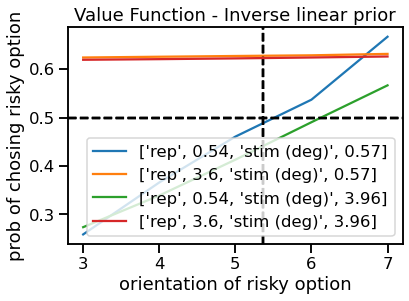

In [187]:
rangeInverseLinear1 = np.linspace(3./180., 7./180., 5)*np.pi
rangeInverseLinear2 = np.linspace(7./180., 14./180., 8)*np.pi
rangeInverseLinear3 = np.linspace(14./180., 26./180., 12)*np.pi
rangeInverseLinear4 = np.linspace(26./180., 43./180., 18)*np.pi

rangeOri = rangeInverseLinear1

sigma_stim_list = [0.001*np.pi,0.007*np.pi]
sigma_rep_list = [0.003, 0.02]
risk_prob = 0.75
type = "inverseLinearPrior"

for sigma_stim in sigma_stim_list:
    for sigma_rep in sigma_rep_list:
        
        sigma_risk_rep = 3*sigma_rep

        safe_value, safe_prob = model.safe_value_dist(rangeOri[0], sigma_stim, sigma_rep , type, bins=100)
        risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, sigma_risk_rep , risk_prob, type, bins=100) 
        p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
        safeVal = model.value_function_ori(rangeOri[0], type)
        riskyVal = risk_prob*model.value_function_ori(rangeOri, type)
        risky_ori = interp1d(riskyVal, rangeOri)
        rationalEquilibrium = risky_ori(safeVal)*180/np.pi
        plt.axvline(rationalEquilibrium, c='k', ls='--')
        plt.axhline(0.5, c='k', ls='--')
        plt.plot(rangeOri*180.0/np.pi, np.squeeze(p_chose_risky), label=['rep',sigma_rep*180., "stim (deg)",round(sigma_stim*180,2)])
        plt.legend()
        plt.xlabel("orientation of risky option")
        plt.ylabel("prob of chosing risky option")
        plt.title("Value Function - Inverse linear prior")
    
    

In [ ]:
# Prior

In [ ]:
rangePrior1 = np.linspace(54./180., 61./180., 8)*np.pi
rangePrior2 = np.linspace(61./180., 68./180., 8)*np.pi
rangePrior3 = np.linspace(68./180., 78./180., 11)*np.pi
rangePrior4 = np.linspace(78./180., 88./180., 11)*np.pi

rangeOri = rangePrior1

sigma_stim_list = {"low_stim" : 0.001*np.pi, "high_stim" : 0.014*np.pi}
sigma_rep_list = {"low_rep":0.001, "high_rep":0.014}
risk_prob = 0.75
type = "prior"

i = -1
for sigma_stim in sigma_stim_list:
    i = i+1
    j = -1
    for sigma_rep in sigma_rep_safe_list:
        
        j= j+1
        
        # Now different sigma for risk and safe representation possible
        sigma_risk = 3*sigma_rep

        safe_value, safe_prob = model.safe_value_dist(rangeOri[0], sigma_stim_list[list(sigma_stim_list.keys())[i]], sigma_rep_list[list(sigma_rep_list.keys())[j]] , type, bins=1000)
        risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim_list[list(sigma_stim_list.keys())[i]], sigma_rep_list[list(sigma_rep_list.keys())[j]], risk_prob, type, bins=1000) 
        p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
        safeVal = model.value_function_ori(rangeOri[0], type)
        riskyVal = risk_prob*model.value_function_ori(rangeOri, type)
        risky_ori = interp1d(riskyVal, rangeOri)
        rationalEquilibrium = risky_ori(safeVal)*180/np.pi
        plt.axvline(rationalEquilibrium, c='k', ls='--')
        plt.axhline(0.5, c='k', ls='--')
        plt.plot(rangeOri*180.0/np.pi, np.squeeze(p_chose_risky), label=[list(sigma_stim_list.keys())[i], list(sigma_rep_list.keys())[j]])
        plt.legend(bbox_to_anchor=(1., 1.0))
        plt.xlabel("orientation of risky option")
        plt.ylabel("prob of chosing risky option")
        plt.title("Value Function - prior")
    
    

In [ ]:
interact(plot_riskAttitudes, sigma_stim = ((0.1/180.0)*np.pi, (1./180.0)*np.pi, (0.1/180.0)*np.pi), sigma_rep = ((0.1/180.0), (3./180.0), (0.2/180.0)))

In [ ]:
def plot_riskAttitudesValue(sigma_stim, sigma_rep):
    risk_prob = 0.75
    type = "prior"

    rangeOri = np.linspace(54./180., 61./180., 8)*np.pi
    safe_value, safe_prob = model.safe_value_dist(rangeOri[0], sigma_stim, sigma_rep , type, bins=25)
    risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, sigma_stim , risk_prob, type, bins=25) 
    p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
    safeVal = model.value_function_ori(rangeOri[0], type)
    riskyVal = risk_prob*model.value_function_ori(rangeOri, type)
    plt.axvline(0, c='k', ls='--')
    plt.axhline(0.5, c='k', ls='--')
    plt.plot(riskyVal - safeVal, np.squeeze(p_chose_risky), label=['rep',sigma_rep, "stim (deg)",round(sigma_stim*180,2)])

    rangeOri = np.linspace(61./180., 68./180., 8)*np.pi
    safe_value, safe_prob = model.safe_value_dist(rangeOri[0], sigma_stim, sigma_rep , type, bins=25)
    risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, sigma_stim , risk_prob, type, bins=25) 
    p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
    safeVal = model.value_function_ori(rangeOri[0], type)
    riskyVal = risk_prob*model.value_function_ori(rangeOri, type)
    plt.axvline(0, c='k', ls='--')
    plt.axhline(0.5, c='k', ls='--')
    plt.plot(riskyVal - safeVal, np.squeeze(p_chose_risky), label=['rep',sigma_rep, "stim (deg)",round(sigma_stim*180,2)])


    rangeOri = np.linspace(68./180., 78./180., 11)*np.pi
    safe_value, safe_prob = model.safe_value_dist(rangeOri[0], sigma_stim, sigma_rep , type, bins=25)
    risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, sigma_stim , risk_prob, type, bins=25) 
    p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
    safeVal = model.value_function_ori(rangeOri[0], type)
    riskyVal = risk_prob*model.value_function_ori(rangeOri, type)
    plt.axvline(0, c='k', ls='--')
    plt.axhline(0.5, c='k', ls='--')
    plt.plot(riskyVal - safeVal, np.squeeze(p_chose_risky), label=['rep',sigma_rep, "stim (deg)",round(sigma_stim*180,2)])


    rangeOri = np.linspace(78./180., 88./180., 11)*np.pi
    safe_value, safe_prob = model.safe_value_dist(rangeOri[0], sigma_stim, sigma_rep , type, bins=25)
    risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, sigma_stim , risk_prob, type, bins=25) 
    p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
    safeVal = model.value_function_ori(rangeOri[0], type)
    riskyVal = risk_prob*model.value_function_ori(rangeOri, type)
    plt.axvline(0, c='k', ls='--')
    plt.axhline(0.5, c='k', ls='--')
    plt.plot(riskyVal - safeVal, np.squeeze(p_chose_risky), label=['rep',sigma_rep, "stim (deg)",round(sigma_stim*180,2)])




    plt.xlabel("Value Difference")
    plt.ylabel("prob of chosing risky option")
    plt.title("Value Function - prior")

In [ ]:
interact(plot_riskAttitudesValue, sigma_stim = ((0.1/180.0)*np.pi, (1./180.0)*np.pi, (0.1/180.0)*np.pi), sigma_rep = ((0.1/180.0), (3./180.0), (0.2/180.0)))